In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: Qt5Agg


## Functions

In [2]:
def RD(num, highs): #Random Deposition Function
    highs[num] += 1

## Generate Data

In [3]:
length = 200 
point_number = 500000

stds = []
time = np.array([])

for k in range(100):
    x = 4

    std = np.array([])
    
    high = np.zeros(length)
    if (k == 0):
        point = []

    for i in range(0,point_number):    
        count = np.random.randint(0, length)
        RD(count,high)
        
        if (i == np.floor(1.3**(x))):
            if (k == 0):
                time = np.append(time,i)
            std = np.append(std,np.std(high))
            x +=1
        if (k == 0):                
            point.append([count,high[count]])
    
    stds.append(std) 
stds = np.transpose(np.array(stds))

In [5]:
final_std = np.zeros(len(stds))
for n in range(0,len(stds)):
    final_std[n] = np.mean(stds[n])

In [6]:
coef = np.polyfit(np.log(time[17:]),np.log(final_std[17:]),1)
betha = coef[0]


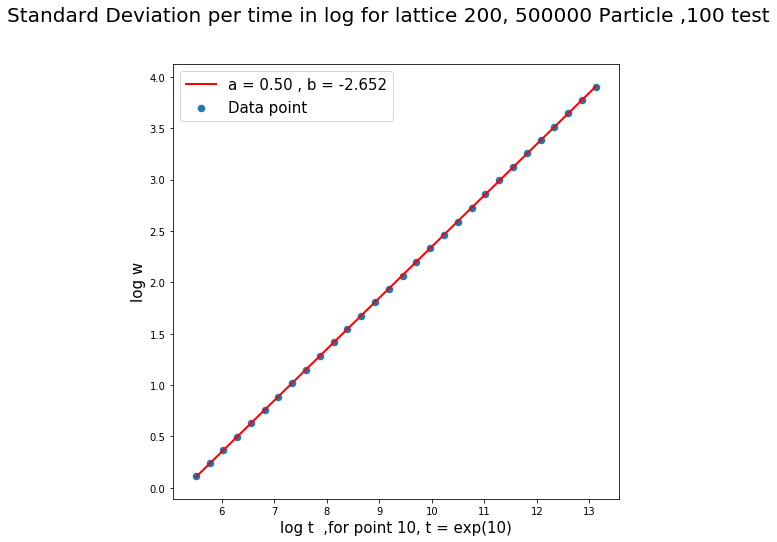

In [18]:

fig = plt.figure(figsize=(8,8))
fig.suptitle('Standard Deviation per time in log for lattice %i, %i Particle ,100 test'%(length,point_number), fontsize=20)

plt.plot(np.log(time[17:]),np.polyval(coef,np.log(time[17:])),'r-',lw = 2,label = 'a = 0.50 , b = -2.652')
plt.scatter(np.log(time[17:]),np.log(final_std[17:]),marker='o',linewidths=1.5, label = 'Data point')
plt.ylabel('log w',fontsize = 15)
plt.xlabel('log t  ,for point 10, t = exp(10)',fontsize = 15)
leg = plt.legend(fontsize = 15);
#plt.savefig('RD fig1')

# Result

In [16]:
print('betha = %.2f , error = %.2f percent'%(betha,((0.50-betha)/0.50)*100))

betha = 0.50 , error = 0.08 percent


## Simulation

In [43]:
%matplotlib
point_number1 = 100000
point = np.transpose(np.array(point))

step = int(np.floor(point_number1 / 4))
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.ion()
ax.axis('off')
fig.show()
fig.canvas.draw()

for i in range(0,point_number1,step):
    if (i/step)%2 == 0 :
        ax.scatter(point[0][i:i+step],point[1][i:i+step],marker='.',c = 'b')
    else:
        ax.scatter(point[0][i:i+step],point[1][i:i+step],marker='.',c = 'r')
    fig.canvas.draw()
    plt.pause(1) 
#plt.savefig('RD fig2')

Using matplotlib backend: Qt5Agg
